# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os, cv2
from tqdm.auto import tqdm

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Data 1

In [4]:
from keras.datasets import mnist

Using TensorFlow backend.


In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_all = np.concatenate((X_train, X_test))
y_all = np.concatenate((y_train,  y_test))

del X_train, X_test, y_train, y_test

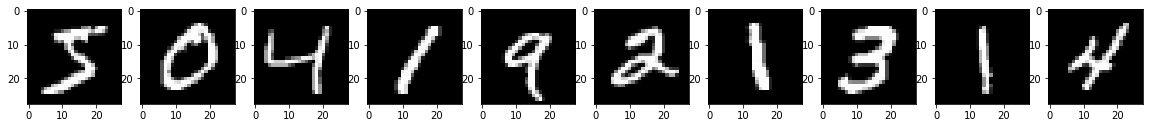

In [6]:
fig, ax = plt.subplots(1, 10, figsize=(20, 6))
for i in range(10):
    ax[i].imshow(X_all[i],cmap=plt.get_cmap('gray'))

In [7]:
X_all = 255 - X_all

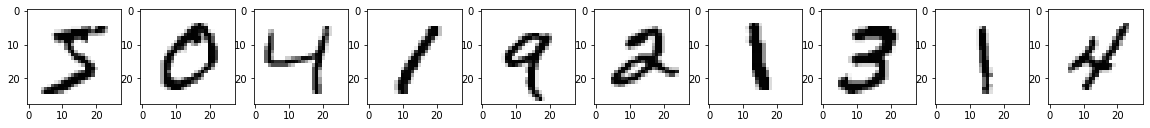

In [8]:
fig, ax = plt.subplots(1, 10, figsize=(20, 6))
for i in range(10):
    ax[i].imshow(X_all[i],cmap=plt.get_cmap('gray'))

# Data 2

In [9]:
X = []
y = []

for i, label in tqdm(enumerate(os.listdir('../data/maths/'))):
    for img in os.listdir(f'../data/maths/{label}'):
        im = plt.imread(f'../data/maths/{label}/{img}', 0)
        X.append(im)
        y.append(i+10)
        
X = np.array(X)
y = np.array(y)

p = np.random.permutation(len(X))
X, y =  X[p], y[p]

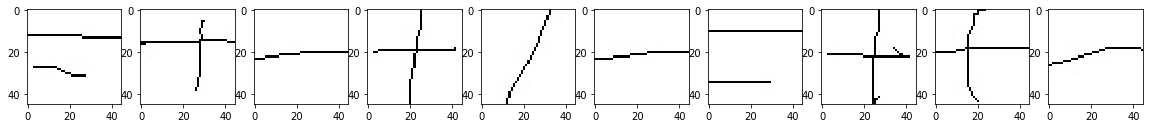

In [10]:
fig, ax = plt.subplots(1, 10, figsize=(20, 6))
for i in range(10):
    ax[i].imshow(X[i],cmap=plt.get_cmap('gray'))

In [11]:
def pad_img(img, pad_size=3, size=(28, 28)):
    return (cv2.resize(
        cv2.copyMakeBorder(img, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_CONSTANT, value=255), 
        size
    ))

In [12]:
X_cpy = X
X = []
for img in X_cpy:
    X.append(pad_img(img, pad_size=5, size=(55, 55)))
X = np.array(X)

del X_cpy

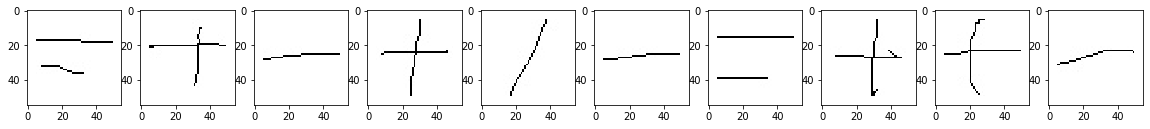

In [13]:
fig, ax = plt.subplots(1, 10, figsize=(20, 6))
for i in range(10):
    ax[i].imshow(X[i],cmap=plt.get_cmap('gray'))

In [14]:
def erode_img(img, kernel=np.ones((2,2),np.uint8), iters=2, size=(28, 28)):
    return (cv2.resize(
        cv2.erode(img, kernel=kernel, iterations=iters), 
        size
    ))

In [15]:
X_cpy = X
X = []
for img in X_cpy:
    X.append(erode_img(img))
X = np.array(X)

del X_cpy

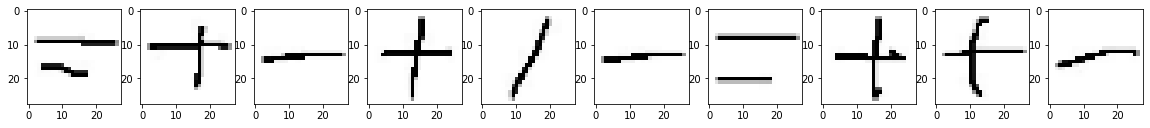

In [16]:
fig, ax = plt.subplots(1, 10, figsize=(20, 6))
for i in range(10):
    ax[i].imshow(X[i],cmap=plt.get_cmap('gray'))

In [19]:
import sys
sys.path.append('../')

from utils.image import ImageAugmenter
from keras.preprocessing.image import ImageDataGenerator

img_aug = ImageDataGenerator(
    rotation_range=10, 
    zoom_range = 0.1,
    width_shift_range=0.1, 
    height_shift_range=0.1,
)

ia_o = ImageAugmenter(img_aug, n_images=7000, cmap='gray')
ia_o.fit_transform('../data/maths/', '../data/maths-balanced/')

Class Distribution: [14294, 14355, 25112, 1067, 13104, 3251, 33997]



Updated Class Distribution
Training: [7027, 0, 0, 0, 0, 0, 0]



Updated Class Distribution
Training: [7027, 7065, 0, 0, 0, 0, 0]



Updated Class Distribution
Training: [7027, 7065, 6978, 0, 0, 0, 0]



Updated Class Distribution
Training: [7027, 7065, 6978, 6995, 0, 0, 0]



Updated Class Distribution
Training: [7027, 7065, 6978, 6995, 7026, 0, 0]



Updated Class Distribution
Training: [7027, 7065, 6978, 6995, 7026, 7024, 0]



Updated Class Distribution
Training: [7027, 7065, 6978, 6995, 7026, 7024, 6964]
